In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score


In [23]:

df = pd.read_csv("Social_Network_Ads.csv")

print(df.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [24]:
print(df.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [25]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [26]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [27]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [28]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [30]:

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [31]:

y_pred = model.predict(X_test)



In [32]:

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [33]:

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)
print("F1 Score:", f1)


Accuracy: 0.9083333333333333
Confusion Matrix:
 [[71  2]
 [ 9 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       0.95      0.81      0.87        47

    accuracy                           0.91       120
   macro avg       0.92      0.89      0.90       120
weighted avg       0.91      0.91      0.91       120

F1 Score: 0.8735632183908046


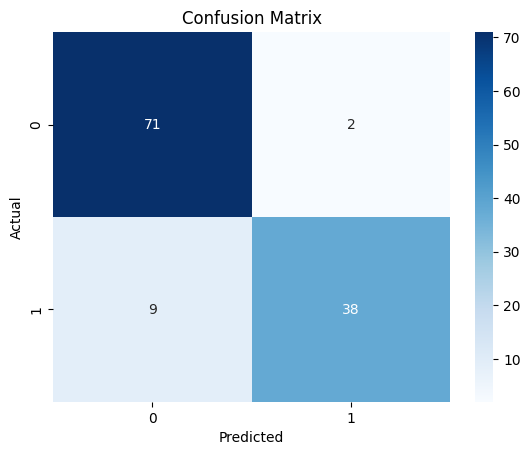

In [34]:

# 12. Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

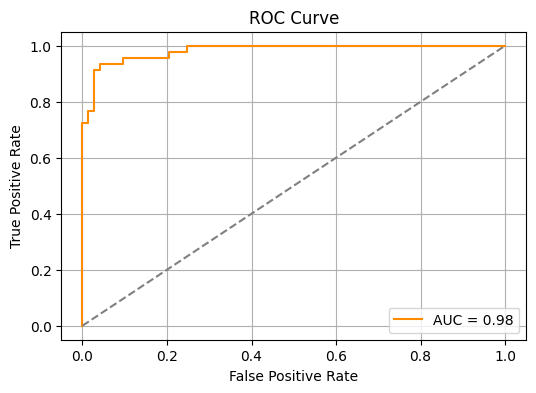

In [35]:

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


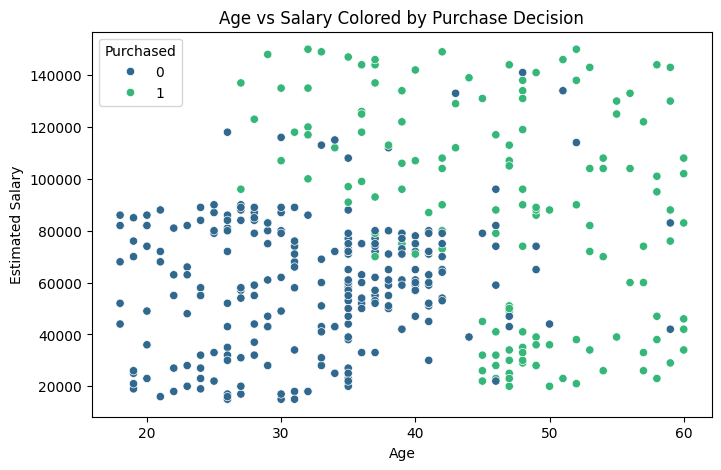

In [36]:
# Visualize age vs estimated salary for different outcomes
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette='viridis')
plt.title('Age vs Salary Colored by Purchase Decision')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()
